In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
data=pd.read_csv("housing.csv")

In [75]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
#this takes the data with non-null and dave it(we use inplace=true) to save the data for the current location
data.dropna(inplace=True)


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [78]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [80]:
train_data=X_train.join(y_train)

In [81]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4021,-118.51,34.17,31.0,3252.0,834.0,1411.0,760.0,3.1885,<1H OCEAN,219000.0
14940,-117.03,32.63,14.0,2796.0,476.0,1466.0,464.0,5.2489,NEAR OCEAN,213700.0
13409,-117.48,34.10,30.0,2287.0,531.0,1796.0,503.0,2.5833,INLAND,90600.0
13491,-117.40,34.06,17.0,5451.0,1008.0,3533.0,940.0,3.9191,INLAND,101600.0
15908,-122.42,37.74,52.0,1916.0,432.0,889.0,424.0,4.0391,NEAR BAY,279900.0
...,...,...,...,...,...,...,...,...,...,...
7325,-118.18,33.99,35.0,1230.0,407.0,1512.0,364.0,2.1520,<1H OCEAN,170800.0
14647,-117.19,32.77,9.0,634.0,152.0,248.0,133.0,3.8571,NEAR OCEAN,143800.0
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,<1H OCEAN,38800.0
16366,-121.30,38.01,30.0,2547.0,485.0,1547.0,501.0,3.9940,INLAND,95500.0


In [89]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

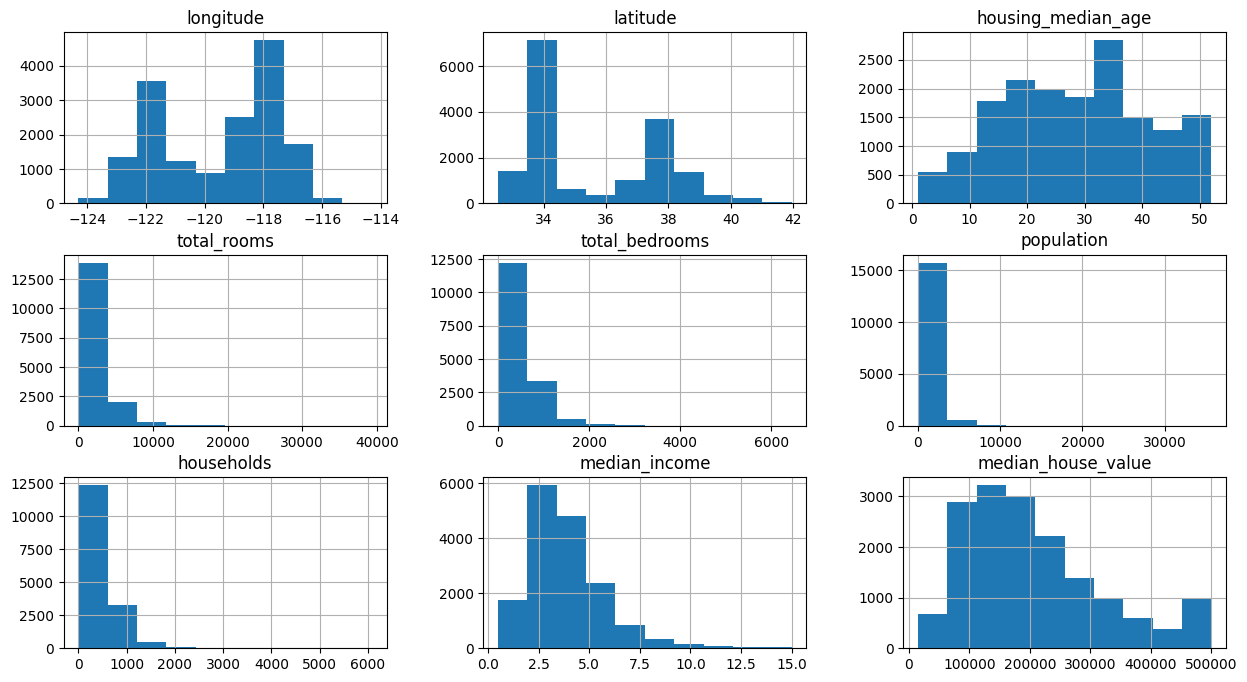

In [82]:
train_data.hist(figsize=(15,8))

In [83]:
numeric_data = train_data.select_dtypes(include=['number'])
numeric_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924056,-0.106678,0.041533,0.066979,0.096034,0.052991,-0.017707,-0.040894
latitude,-0.924056,1.000000,0.010336,-0.032659,-0.063996,-0.104723,-0.067733,-0.078407,-0.148856
housing_median_age,-0.106678,0.010336,1.000000,-0.359165,-0.320046,-0.292869,-0.302493,-0.121839,0.104101
total_rooms,0.041533,-0.032659,-0.359165,1.000000,0.930663,0.856534,0.920020,0.198030,0.134298
total_bedrooms,0.066979,-0.063996,-0.320046,0.930663,1.000000,0.876476,0.980397,-0.005749,0.049015
population,0.096034,-0.104723,-0.292869,0.856534,0.876476,1.000000,0.905268,0.005732,-0.021927
households,0.052991,-0.067733,-0.302493,0.920020,0.980397,0.905268,1.000000,0.015367,0.064317
median_income,-0.017707,-0.078407,-0.121839,0.198030,-0.005749,0.005732,0.015367,1.000000,0.690940
median_house_value,-0.040894,-0.148856,0.104101,0.134298,0.049015,-0.021927,0.064317,0.690940,1.000000


<Axes: >

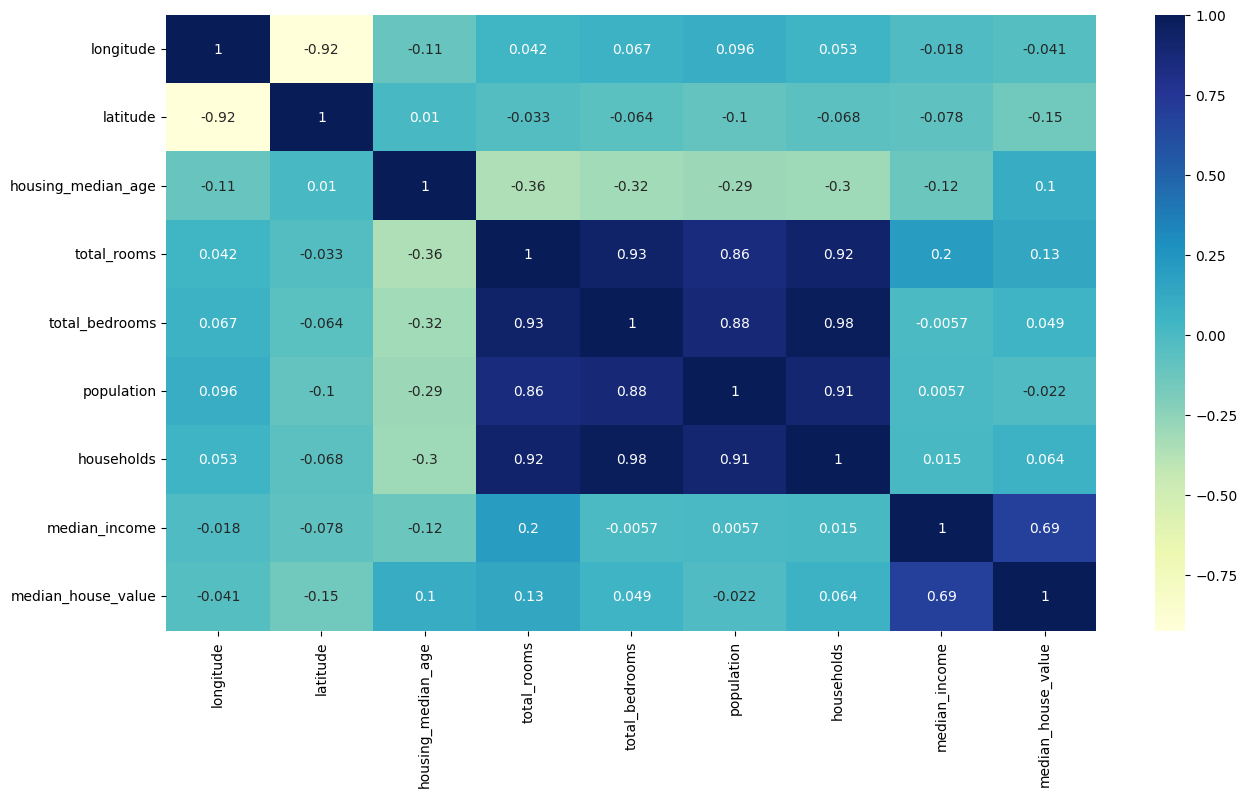

In [84]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="YlGnBu")

In [85]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

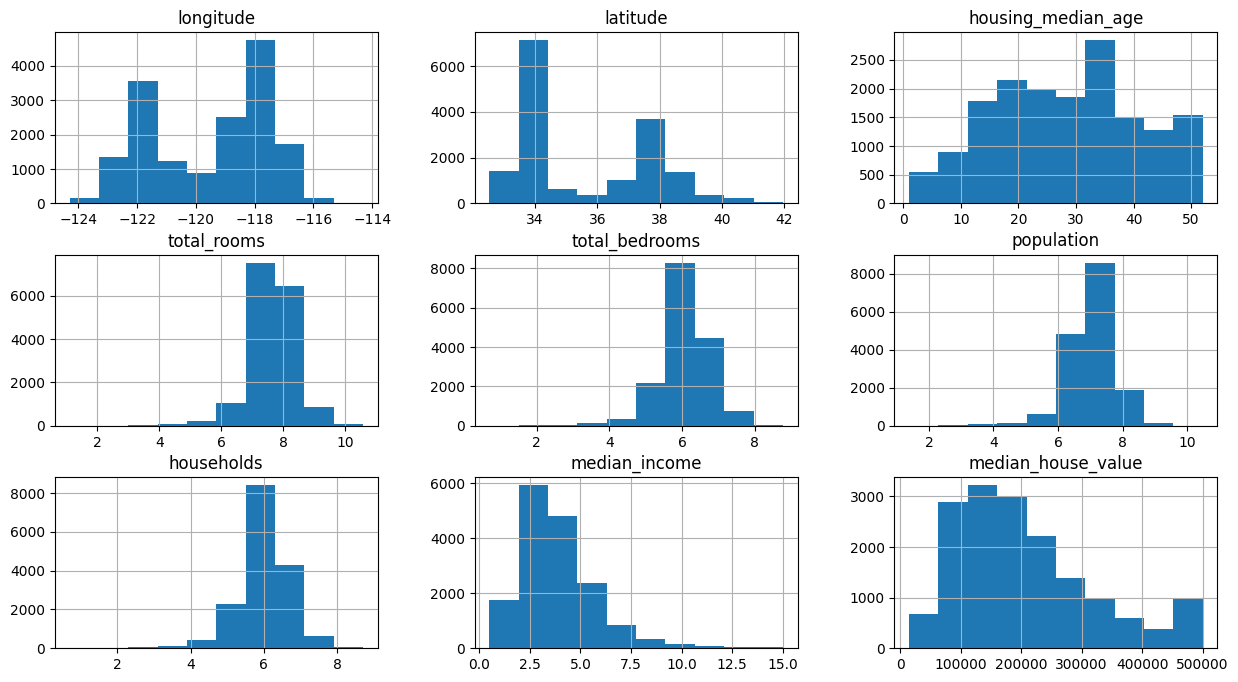

In [86]:
train_data.hist(figsize=(15,8))

In [88]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 4021 to 16327
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   bedroom_ration      16346 non-null  float64
 10  household_rooms     16346 non-null  float64
 11  <1H OCEAN           16346 non-null  bool   
 12  INLAND              16346 non-null  bool   
 13  ISLAND              16346 non-null  bool   
 14  NEAR BAY            16346 non-null  bool   
 15  NEAR OCEAN          16346 non-null  bool   
dtypes: boo

<Axes: >

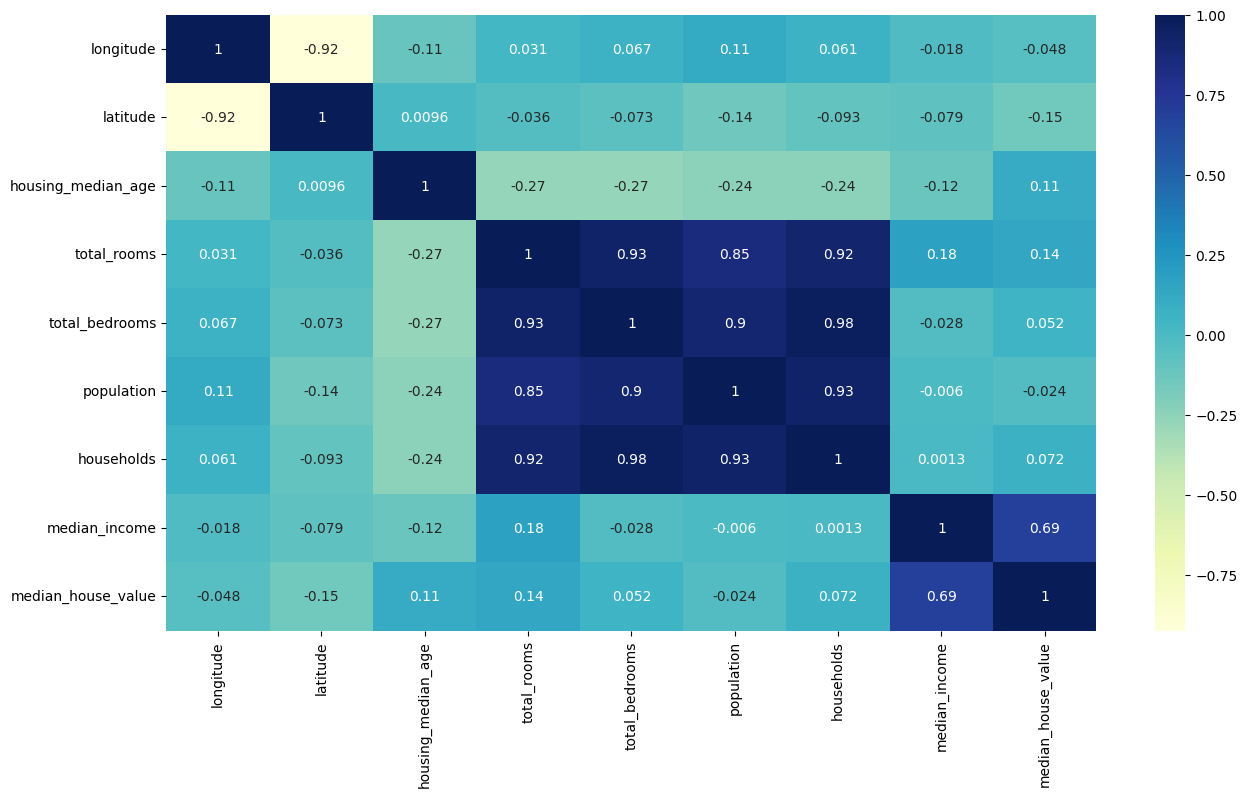

In [43]:
numeric_data=train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

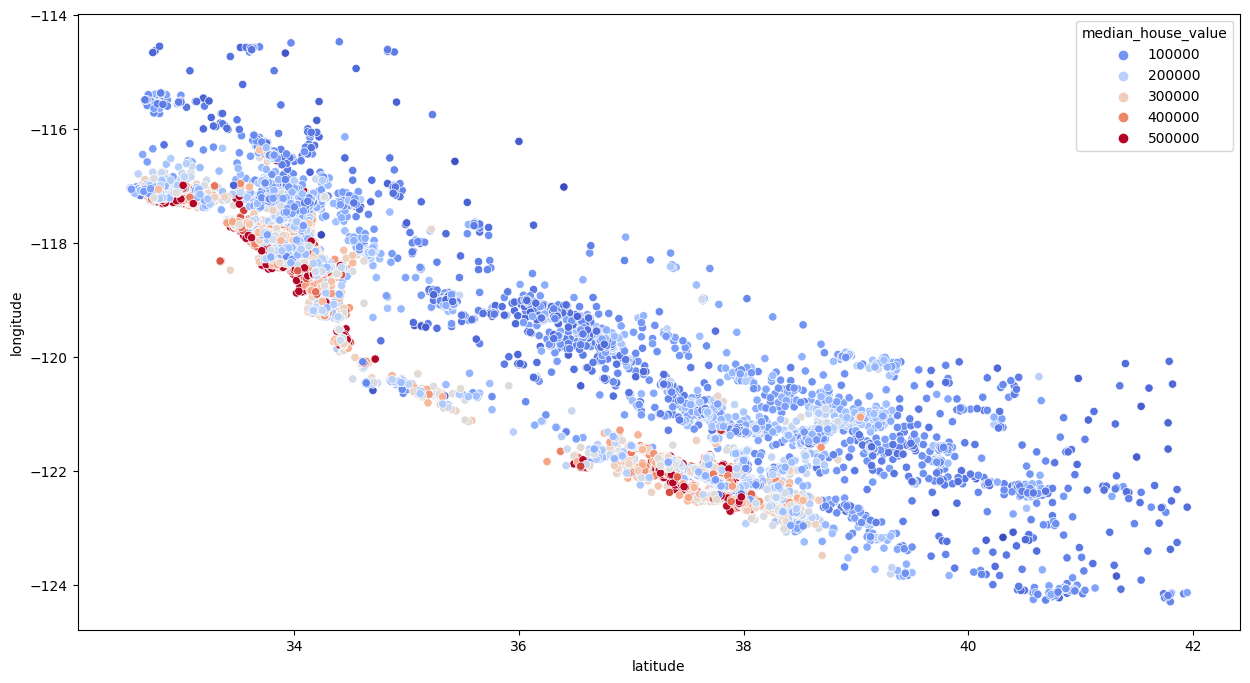

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y="longitude",data=train_data,hue='median_house_value',palette='coolwarm')

In [87]:
 train_data['bedroom_ration']=train_data['total_bedrooms']/train_data['total_rooms']
 train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

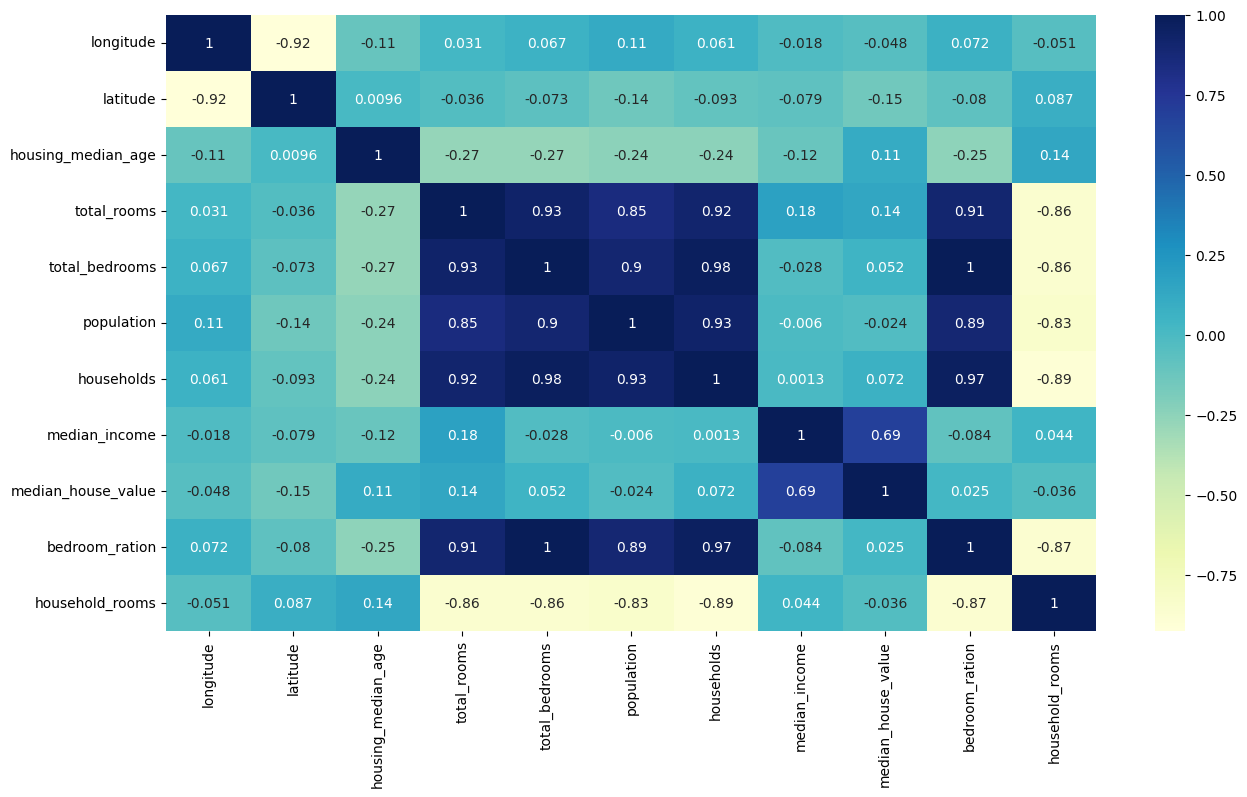

In [47]:
numeric_data=train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="YlGnBu")

In [48]:
from sklearn.linear_model import LinearRegression
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
test_data=X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

In [51]:
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [52]:
test_data['bedroom_ration']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [55]:
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [56]:
reg.score(X_test,y_test)

-2190.259805836398